Q1) Using placement.csv Find the simple linear regression that fits the
given data and predict on test data.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("placement.csv")


In [34]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [35]:
# Step 2: Identify Independent and Dependent Variables
X = data[['cgpa']]  # Independent variable (cgpa)
y = data['package']  # Dependent variable (package)

In [36]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Step 4: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08417638361329656
R-squared: 0.7730984312051673


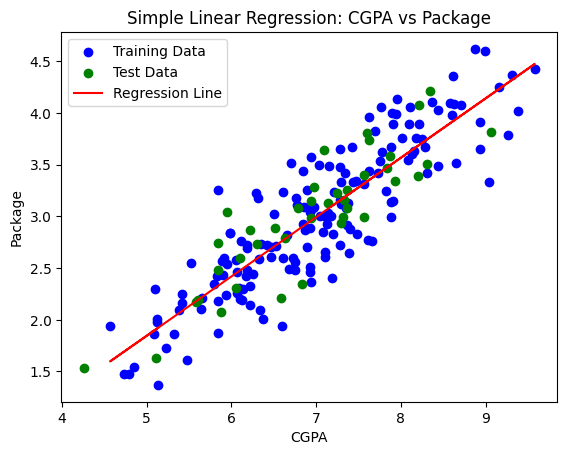

In [39]:
# Step 7: Plotting the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title('Simple Linear Regression: CGPA vs Package')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()
plt.show()

Q2) The objective of this project is to predict the salary of individuals
from various countries and racial backgrounds based on their
demographic information, including occupation, age, gender, years of
experience, education, and more. The dataset consists of 32,561 rows and
15 columns, with 8 independent variables and 1 target variable, which is
the individual&#39;s salary.

In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and Inspect the Data
data = pd.read_csv('Salary_Data_Based_country_and_race.csv')

# Displaying first few rows to check the data structure
print(data.head())

   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  


In [41]:
# Step 2: Preprocessing Data

# Handle missing values (if any)
data = data.dropna()  # Dropping rows with missing values (optional: you can choose to impute missing values)

# Step 3: Feature Encoding
# One-hot encode categorical columns: 'Gender', 'Education Level', 'Job Title', 'Country', 'Race'
categorical_columns = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']

In [42]:
# Step 4: Splitting Data into Features and Target Variable
X = data.drop(columns=['Salary', 'Unnamed: 0'])  # Features (independent variables)
y = data['Salary']  # Target variable (Salary)

# Step 5: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build a pipeline for preprocessing and modeling
# We will use a column transformer to handle categorical and numerical features separately


In [43]:
# Numerical columns to scale (Age, Years of Experience)
numerical_columns = ['Age', 'Years of Experience']

# Create a column transformer with handle_unknown='ignore' for OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)   # One-hot encode categorical features and ignore unknown categories
    ])

# Build a pipeline that first preprocesses the data, then applies Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [44]:
# Step 7: Fit the model on training data
pipeline.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 359124691.20122683
R-squared: 0.8740558219855055


In [48]:

# Step 10: Feature Importance (using coefficients from the model)
# After fitting the model, the coefficients give us the importance of each feature
# Extract the coefficients from the linear regression model
coefficients = pipeline.named_steps['regressor'].coef_

# Get feature names after one-hot encoding
encoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)
all_feature_names = numerical_columns + list(encoded_feature_names)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the feature importance
print("Feature Importance (sorted by coefficients):")
print(feature_importance)



Feature Importance (sorted by coefficients):
                                          Feature    Coefficient
18                   Job Title_Chief Data Officer  101855.922253
19             Job Title_Chief Technology Officer   89596.854471
97                   Job Title_Marketing Director   88926.224456
35             Job Title_Director of Data Science   81502.730491
111                   Job Title_Research Director   74268.993643
..                                            ...            ...
44                    Job Title_Event Coordinator  -64149.521294
172                 Job Title_Training Specialist  -67581.680828
13             Job Title_Administrative Assistant  -71080.137674
66   Job Title_Junior Business Operations Analyst  -79492.670700
100                      Job Title_Office Manager  -81994.417442

[193 rows x 2 columns]


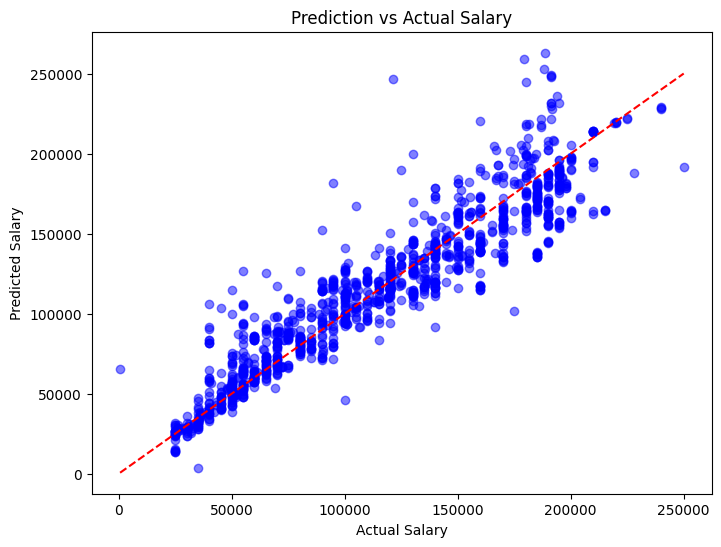

In [47]:
# Step 11: Visualization of Predictions vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Prediction vs Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()
